# **Lab 2**

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Section 3**

### **Subsection 3.1**

We want to approximate two functions
$$f(x)=\sin(2x), \quad g(x)=\text{square}(2x) = \begin{cases}1&, \sin(2x) \geq 0 \\ -1 &, \sin(2x)<0 \end{cases}$$

Let us define our input pattern and output pattern to approximate both functions.

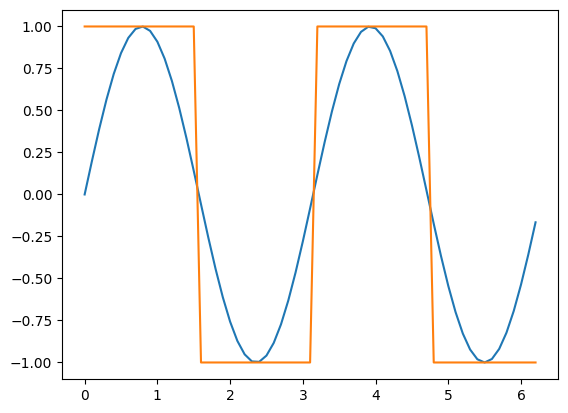

In [197]:
pattern = []
i = 0
while i*0.1 < 2*np.pi:
    pattern.append(i*0.1)
    i+=1
x_train = np.array(pattern)
y_sin_train = np.sin(2*x_train)

x_test = x_train+0.05
y_sin_test = np.sin(2*x_test)

y_box_train = []
y_box_test = []

for x in x_train:
    value = 1 if np.sin(2*x) >= 0 else -1
    y_box_train.append(value)
for x in x_test:
    value = 1 if np.sin(2*x) >= 0 else -1
    y_box_test.append(value)

plt.figure()
plt.plot(x_train, y_sin_train)
plt.plot(x_train, y_box_train)
plt.show()

Define the RBF and find how many units are needed for various errors. We place the centers uniformly on [0, $2\pi$] and let sigma = 1. We include no bias since it is not needed because the RBFS cover the entire interval [0, $2\pi$]. 

ae = 0.09315375276938219 for N=5
sigma = 1
ae = 0.009353380145336694 for N=10
sigma = 1
ae = 0.0003364528855936354 for N=13
sigma = 1


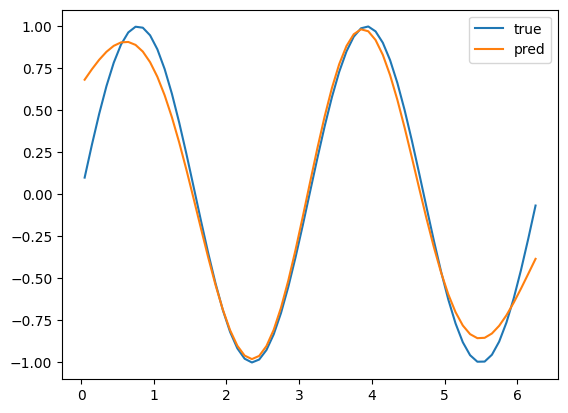

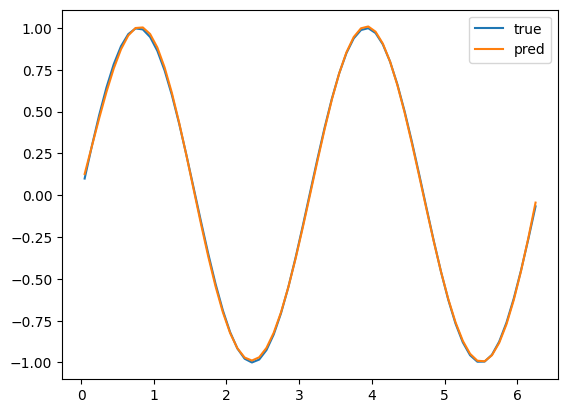

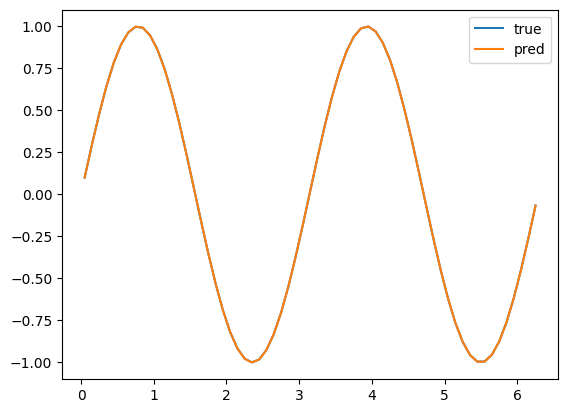

np.float64(0.0003364528855936354)

In [199]:
def phi(x, c, sigma):
    return np.exp(-(x-c)**2 / (2*sigma**2))


def RBF_batch(N,sigma, x_train, y_train, x_test, y_test, plot=False, metric = "MAE"):
    centers = np.linspace(0,2*np.pi, N+1)[1:]
    Phi= np.array([[phi(x, c, sigma) for c in centers] for x in x_train])
    w=np.linalg.solve(Phi.T@Phi, Phi.T@y_train)
    
    # add bias?
    #print(w)
    y_test_pred = []
    Phi_test = np.array([[phi(x, c, sigma) for c in centers] for x in x_test])
    y_test_pred = Phi_test @ w
    
    ae = 0
    if metric == "MAE":
        for i in range(len(y_test)):
            ae += abs(y_test[i]-y_test_pred[i])
        ae /= len(y_test)
    elif metric == "RMSE":
        ae = float(np.square(np.mean((y_test - y_test_pred)**2)))
    else:
        return np.inf
    
    if plot:
        plt.figure()
        plt.plot(x_test, y_test, label="true")
        plt.plot(x_test, y_test_pred, label="pred")
        plt.legend()
        plt.show()
    
    return ae
    
            
    

counter = 0
thresholds = [0.1, 0.01, 0.001]
nodes = []
sigma = 1
for N in range(3,len(x_train)):
    ae = RBF_batch(N,sigma, x_train, y_sin_train, x_test, y_sin_test, False)
    if ae < thresholds[counter]:
        print(f"ae = {ae} for N={N}")
        print(f"sigma = {sigma}")
        counter+=1
        nodes.append(N)
    if counter > 2:
        break
    
RBF_batch(nodes[0], sigma, x_train, y_sin_train, x_test, y_sin_test, True)
RBF_batch(nodes[1], sigma, x_train, y_sin_train, x_test, y_sin_test, True)
RBF_batch(nodes[2], sigma, x_train, y_sin_train, x_test, y_sin_test, True)


Let us do the same for the square function, we must look at this better.

ae = 0.08876548363588471 for N=59
sigma = 0.05


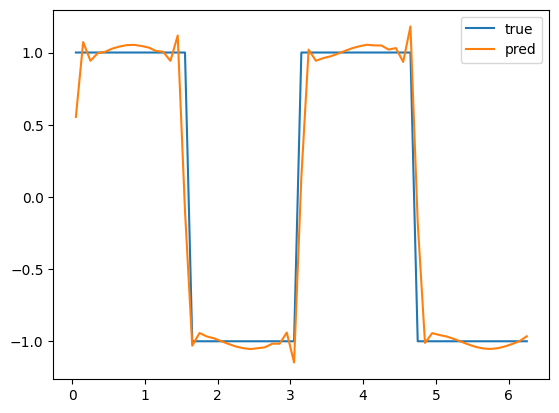

In [87]:
counter = 0
thresholds = [0.1, 0.01, 0.001]
nodes = []
sigma = 0.05
for N in range(3,len(x_train)):
    ae = RBF_batch(N,sigma, x_train, y_box_train, x_test, y_box_test, False)
    if ae < thresholds[counter]:
        print(f"ae = {ae} for N={N}")
        print(f"sigma = {sigma}")
        counter+=1
        nodes.append(N)
    if counter > 2:
        break

for node in nodes:
    RBF_batch(node, sigma, x_train, y_box_train, x_test, y_box_test, True)


We want to modify to get 0 error, select 4 centers, at each maximum and minimum of sin(2x). Then each Rbfs covers one either positive or negative segment of the square function

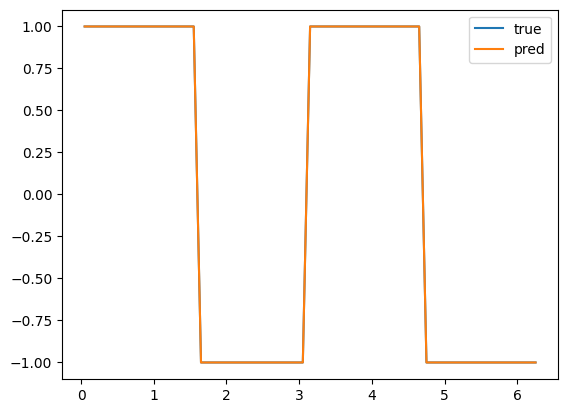

Error = 0.0


In [ ]:
def RBF_batch_modi(x_train, y_train, x_test, y_test, plot=False, metric = "MAE"):
    centers = [np.pi/4 + i*np.pi/2 for i in range(4)]
    sigma = np.pi/8
    Phi = np.array([[phi(x, c, sigma) for c in centers] for x in x_train])
    w=np.linalg.solve(Phi.T@Phi, Phi.T@y_train)

    y_test_pred = []
    Phi_test = np.array([[phi(x, c, sigma) for c in centers] for x in x_test])
    y_test_pred = Phi_test @ w
    
    for i in range(len(y_test)):
        if y_test_pred[i] >= 0:
            y_test_pred[i] = 1
        else:
            y_test_pred[i] = -1
    
    ae = 0
    for i in range(len(y_test)):
        ae += abs(y_test[i]-y_test_pred[i])
    ae /= len(y_test)
    
    
    if plot:
        plt.figure()
        plt.plot(x_test, y_test, label="true")
        plt.plot(x_test, y_test_pred, label="pred")
        plt.legend()
        plt.show()
    
    return ae
    
            
    
ae = RBF_batch_modi(x_train, y_box_train, x_test, y_box_test, True)
print(f"Error = {ae}")

### **Subsection 3.2**

We begin by adding zero mean gaussian noise to both training and testing datasets.

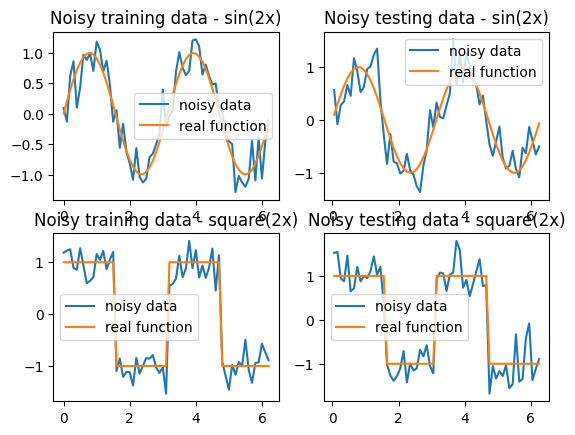

In [97]:

rng = np.random.default_rng(42)  # reproducible

var = 0.1
std = np.sqrt(var)

y_sin_train_noisy = y_sin_train + rng.normal(0.0, std, size=np.shape(y_sin_train))
y_box_train_noisy = y_box_train + rng.normal(0.0, std, size=np.shape(y_box_train))
y_sin_test_noisy  = y_sin_test  + rng.normal(0.0, std, size=np.shape(y_sin_test))
y_box_test_noisy  = y_box_test  + rng.normal(0.0, std, size=np.shape(y_box_test))


plt.figure()
plt.subplot(2,2,1)
plt.title("Noisy training data - sin(2x)")
plt.plot(x_train, y_sin_train_noisy, label = "noisy data")
plt.plot(x_train, y_sin_train, label = "real function")
plt.legend()
plt.subplot(2,2,2)
plt.title("Noisy testing data - sin(2x)")
plt.plot(x_test, y_sin_test_noisy, label = "noisy data")
plt.plot(x_test, y_sin_test, label = "real function")
plt.legend()
plt.subplot(2,2,3)
plt.title("Noisy training data - square(2x)")
plt.plot(x_train, y_box_train_noisy, label = "noisy data")
plt.plot(x_train, y_box_train, label = "real function")
plt.legend()
plt.subplot(2,2,4)
plt.title("Noisy testing data - square(2x)")
plt.plot(x_test, y_box_test_noisy, label = "noisy data")
plt.plot(x_test, y_box_test, label = "real function")
plt.legend()


plt.show()

create online rbf learning. Again we use no bias since it isn't needed.

In [167]:
def RBF_online(N, eta ,sigma, x_train, y_train, x_test, y_test, epochs, plot=False, metric = "MAE"):
    # select centers uniformly
    centers = np.linspace(0,2*np.pi, N+1)[1:]
    # initialize weights.
    W = np.random.randn(N,)*0.1
    
    for epoch in range(epochs):
        order = list(range(len(x_train)))
        np.random.shuffle(order)
        for i in order:
            Phi_i = np.array([phi(x_train[i], c, sigma) for c in centers])
            delta_W = eta * (y_train[i] - Phi_i.T @ W) * Phi_i
            W += delta_W
        
    
    y_test_pred = []
    Phi_test = np.array([[phi(x, c, sigma) for c in centers] for x in x_test])
    y_test_pred = Phi_test @ W
    
    ae = 0
    if metric == "MAE":
        for i in range(len(y_test)):
            ae += abs(y_test[i]-y_test_pred[i])
        ae /= len(y_test)
    elif metric == "RMSE":
        ae = float(np.square(np.mean((y_test - y_test_pred)**2)))
    else:
        return np.inf
    
    if plot:
        plt.figure()
        plt.plot(x_test, y_test, label="true")
        plt.plot(x_test, y_test_pred, label="pred")
        plt.legend()
        plt.show()
    
    return ae
    

### Task 1

Evaluate 5 different values of nodes and 5 widths for noisy sin data. We use RMSE, do we need to say why

In [169]:
Ns = [5,10,20,30,40]
sigmas = [0.03,0.05,0.1,0.5,1]
errors = [[[np.inf for _ in range(2)] for _ in range(5)] for _ in range(5)]

for i in range(len(Ns)):
    for j in range(len(sigmas)):
        ae = RBF_online(Ns[i], 0.01, sigmas[j], x_train, y_sin_train_noisy, x_test, y_sin_test_noisy, 500, False, "RMSE")
        errors[i][j][0] = ae
        ae = RBF_batch(Ns[i], sigmas[j], x_train, y_sin_train_noisy, x_test, y_sin_test_noisy, False, "RMSE")
        errors[i][j][1] = ae

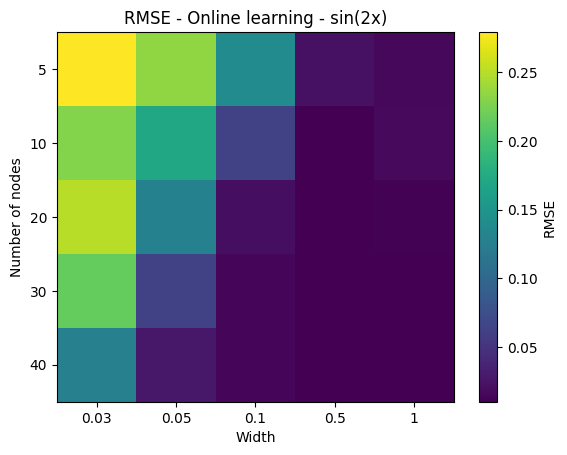

In [174]:
online_errors = np.array(errors)[...,0]
plt.imshow(online_errors, aspect='auto')   # 'equal' keeps square cells; 'auto' fits figure
plt.colorbar(label='RMSE')
plt.title('RMSE - Online learning - sin(2x)')
plt.xlabel('Width')
plt.ylabel('Number of nodes')
plt.yticks(ticks = range(len(Ns)), labels = Ns)
plt.xticks(ticks = range(len(sigmas)), labels = sigmas)
plt.show()

In [173]:
flat_idx = np.argmin(online_errors)
i,j = np.unravel_index(flat_idx, online_errors.shape)
method = ["online", "batch"]
print(f"min error = {np.min(online_errors)}")
print(f"Method = {method[0]}, N = {Ns[i]}, sigma = {sigmas[j]}")


min error = 0.0101209211508637
Method = online, N = 40, sigma = 1


and for batch

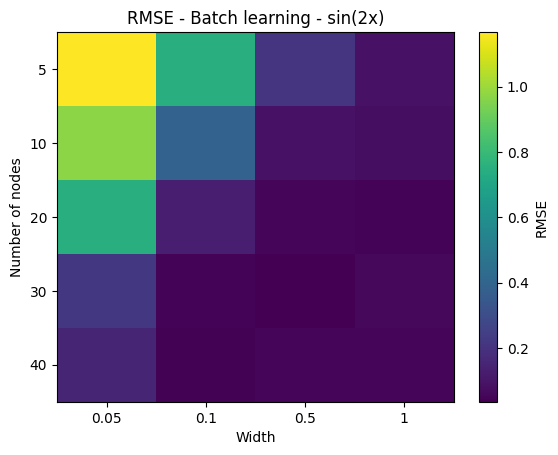

min error = 0.03537361755256718
Method = batch, N = 30, sigma = 0.1


In [183]:
batch_errors = np.array(errors)[:,1:,1]
plt.imshow(batch_errors, aspect='auto')   # 'equal' keeps square cells; 'auto' fits figure
plt.colorbar(label='RMSE')
plt.title('RMSE - Batch learning - sin(2x)')
plt.xlabel('Width')
plt.ylabel('Number of nodes')
plt.yticks(ticks = range(len(Ns)), labels = Ns)
plt.xticks(ticks = range(len(sigmas)-1), labels = sigmas[1:])
plt.show()
flat_idx = np.argmin(batch_errors)
i,j = np.unravel_index(flat_idx, batch_errors.shape)
method = ["online", "batch"]
print(f"min error = {np.min(batch_errors)}")
print(f"Method = {method[1]}, N = {Ns[i]}, sigma = {sigmas[j]}")

Do the same for square function.

In [188]:
Ns = [5,10,20,30,40]
sigmas = [0.03,0.05,0.1,0.5,1]
errors_box = [[[np.inf for _ in range(2)] for _ in range(5)] for _ in range(5)]

for i in range(len(Ns)):
    for j in range(len(sigmas)):
        ae = RBF_online(Ns[i], 0.01, sigmas[j], x_train, y_box_train_noisy, x_test, y_box_test_noisy, 500, False, "RMSE")
        errors_box[i][j][0] = ae
        ae = RBF_batch(Ns[i], sigmas[j], x_train, y_box_train_noisy, x_test, y_box_test_noisy, False, "RMSE")
        errors_box[i][j][1] = ae

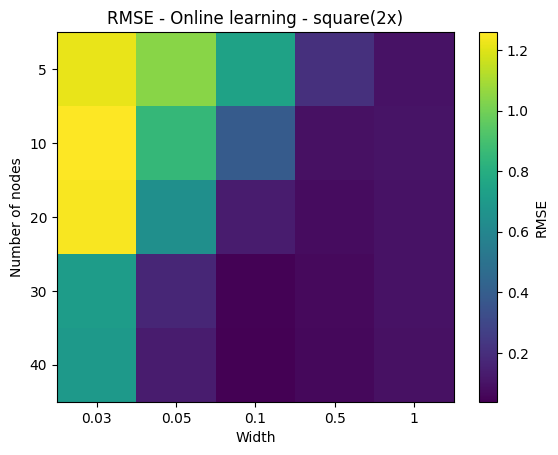

In [192]:
online_errors_box = np.array(errors_box)[...,0]
plt.imshow(online_errors_box, aspect='auto')   # 'equal' keeps square cells; 'auto' fits figure
plt.colorbar(label='RMSE')
plt.title('RMSE - Online learning - square(2x)')
plt.xlabel('Width')
plt.ylabel('Number of nodes')
plt.yticks(ticks = range(len(Ns)), labels = Ns)
plt.xticks(ticks = range(len(sigmas)), labels = sigmas)
plt.show()

In [193]:
flat_idx = np.argmin(online_errors_box)
i,j = np.unravel_index(flat_idx, online_errors_box.shape)
method = ["online", "batch"]
print(f"min error = {np.min(online_errors_box)}")
print(f"Method = {method[0]}, N = {Ns[i]}, sigma = {sigmas[j]}")

min error = 0.03841398653248738
Method = online, N = 40, sigma = 0.1


and for batch

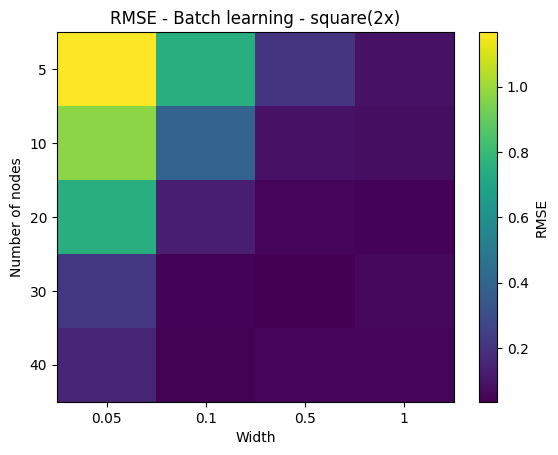

min error = 0.03537361755256718
Method = batch, N = 30, sigma = 0.1


In [195]:
batch_errors_box = np.array(errors_box)[:,1:,1]
plt.imshow(batch_errors_box, aspect='auto')   # 'equal' keeps square cells; 'auto' fits figure
plt.colorbar(label='RMSE')
plt.title('RMSE - Batch learning - square(2x)')
plt.xlabel('Width')
plt.ylabel('Number of nodes')
plt.yticks(ticks = range(len(Ns)), labels = Ns)
plt.xticks(ticks = range(len(sigmas)-1), labels = sigmas[1:])
plt.show()
flat_idx = np.argmin(batch_errors_box)
i,j = np.unravel_index(flat_idx, batch_errors_box.shape)
method = ["online", "batch"]
print(f"min error = {np.min(batch_errors_box)}")
print(f"Method = {method[1]}, N = {Ns[i]}, sigma = {sigmas[j]}")

### Task 2

Let us now think of the training set as a validation set. Let us look at the best online model for sin(2x), that is with 40 nodes and 1 in width.

In [218]:
def RBF_online_2(N, eta ,sigma, x_train, y_train, x_test, y_test, epochs, plot=False, metric = "MAE"):
    # select centers uniformly
    centers = np.linspace(0,2*np.pi, N+1)[1:]
    # initialize weights.
    W = np.random.randn(N,)*0.1
    training_errors = []
    Phi_train = np.array([[phi(x, c, sigma) for c in centers] for x in x_train])
    y_train_pred = Phi_train @ W
    ae = 0
    if metric == "MAE":
        for i in range(len(y_train)):
            ae += abs(y_train[i]-y_train_pred[i])
        ae /= len(y_train)
    elif metric == "RMSE":
        ae = float(np.square(np.mean((y_train - y_train_pred)**2)))
    training_errors.append(ae)
    
    for epoch in range(epochs):
        order = list(range(len(x_train)))
        np.random.shuffle(order)
        for i in order:
            Phi_i = np.array([phi(x_train[i], c, sigma) for c in centers])
            delta_W = eta * (y_train[i] - Phi_i.T @ W) * Phi_i
            W += delta_W
        
        Phi_train = np.array([[phi(x, c, sigma) for c in centers] for x in x_train])
        y_train_pred = Phi_train @ W
        ae = 0
        if metric == "MAE":
            for i in range(len(y_train)):
                ae += abs(y_train[i]-y_train_pred[i])
            ae /= len(y_train)
        elif metric == "RMSE":
            ae = float(np.square(np.mean((y_train - y_train_pred)**2)))
        training_errors.append(ae)
        
    
    y_test_pred = []
    Phi_test = np.array([[phi(x, c, sigma) for c in centers] for x in x_test])
    y_test_pred = Phi_test @ W
    
    ae = 0
    if metric == "MAE":
        for i in range(len(y_test)):
            ae += abs(y_test[i]-y_test_pred[i])
        ae /= len(y_test)
    elif metric == "RMSE":
        ae = float(np.square(np.mean((y_test - y_test_pred)**2)))
    else:
        return np.inf
    
    if plot:
        plt.figure()
        plt.plot(x_test, y_test, label="true")
        plt.plot(x_test, y_test_pred, label="pred")
        plt.legend()
        plt.show()
    
    return ae, training_errors

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
/var/folders/f4/696wvzy10_x0nx1mhv2tsws80000gn/T/ipykernel_39909/2222524679.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(list(range(len(training_errors))), training_errors, label =f"$\eta = {eta}$")


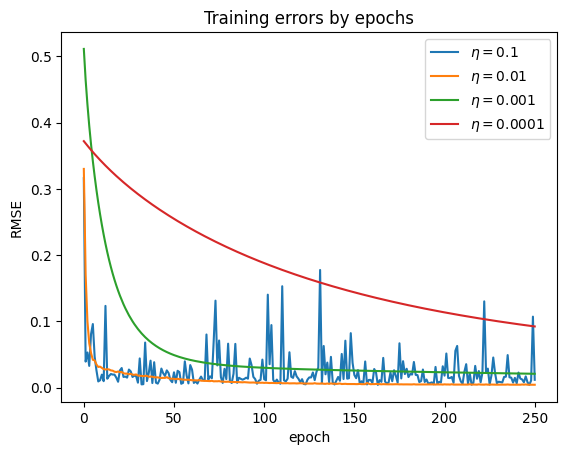

In [219]:
plt.figure()
etas = [0.1,0.01,0.001,0.0001]
for eta in etas:
    ae, training_errors = RBF_online_2(40, eta, 1, x_train, y_sin_train_noisy, x_test, y_sin_test_noisy, 250, False, "RMSE")
    plt.plot(list(range(len(training_errors))), training_errors, label =f"$\eta = {eta}$")
plt.legend()
plt.title("Training errors by epochs")
plt.xlabel("epoch")
plt.ylabel("RMSE")
plt.show()

### Task 3
How important is the position of the nodes. Let's compare three methods.
- Select centers randomly from x_train
- Select centers with equal distance between eachother -> we use this
- Select centers randomly from 0 to $2\pi$

In [236]:
def RBF_online_3(N, eta ,sigma, x_train, y_train, x_test, y_test, epochs, plot=False, metric = "MAE", c_dist = "uniform"):
    if c_dist == "uniform":
        # select centers uniformly
        centers = np.linspace(0,2*np.pi, N+1)[1:]
    elif c_dist == "random":
        centers = np.random.rand(N,)*2*np.pi
    elif c_dist == "rand_points":
        centers = np.random.choice(x_train, N)
    # initialize weights.
    W = np.random.randn(N,)*0.1
    
    for epoch in range(epochs):
        order = list(range(len(x_train)))
        np.random.shuffle(order)
        for i in order:
            Phi_i = np.array([phi(x_train[i], c, sigma) for c in centers])
            delta_W = eta * (y_train[i] - Phi_i.T @ W) * Phi_i
            W += delta_W
        
    
    y_test_pred = []
    Phi_test = np.array([[phi(x, c, sigma) for c in centers] for x in x_test])
    y_test_pred = Phi_test @ W
    
    ae = 0
    if metric == "MAE":
        for i in range(len(y_test)):
            ae += abs(y_test[i]-y_test_pred[i])
        ae /= len(y_test)
    elif metric == "RMSE":
        ae = float(np.square(np.mean((y_test - y_test_pred)**2)))
    else:
        return np.inf
    
    if plot:
        plt.figure()
        plt.plot(x_test, y_test, label="true")
        plt.plot(x_test, y_test_pred, label="pred")
        plt.legend()
        plt.show()
    
    return ae

iters = 50
methods = ["uniform", "random", "rand_points"]
errors_centers = [0,0,0]
for i in range(3):
    for _ in range(iters):
        ae = RBF_online_3(10, 0.01, 0.05, x_train, y_sin_train_noisy, x_test, y_sin_test_noisy, 250, False, "RMSE", methods[i])
        errors_centers[i] += ae
    errors_centers[i] /= iters
    print(f"Average RMSE for {iters} iterations: {errors_centers[i]}")
    


    

Average RMSE for 50 iterations: 0.1743182260336864
Average RMSE for 50 iterations: 0.2201710841592579
Average RMSE for 50 iterations: 0.21567596610564566


### Task 4

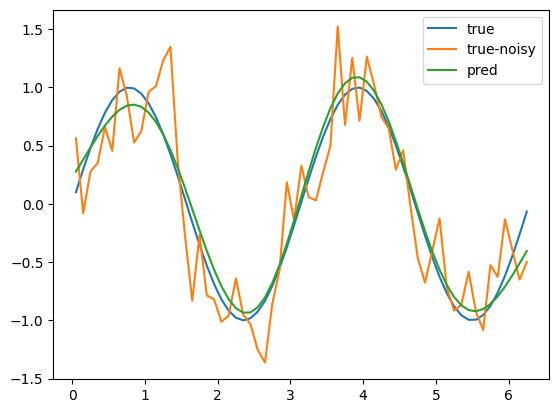

0.011195064971784068
9.621082702327474e-05


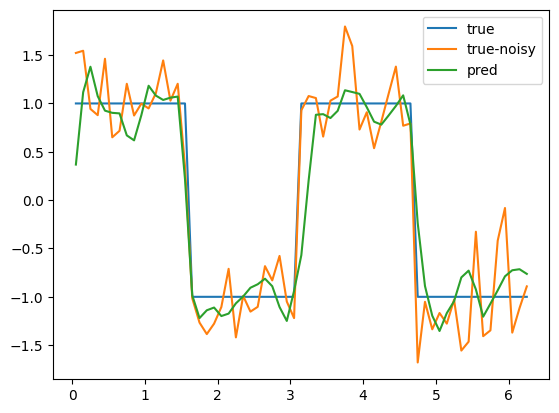

0.04375085766950696
0.010275203775732843


In [249]:
def RBF_online_4(N, eta ,sigma, x_train, y_train, x_test, y_test_noisy, y_test, epochs, plot=False, metric = "MAE"):
    # select centers uniformly
    centers = np.linspace(0,2*np.pi, N+1)[1:]
    # initialize weights.
    W = np.random.randn(N,)*0.1
    
    for epoch in range(epochs):
        order = list(range(len(x_train)))
        np.random.shuffle(order)
        for i in order:
            Phi_i = np.array([phi(x_train[i], c, sigma) for c in centers])
            delta_W = eta * (y_train[i] - Phi_i.T @ W) * Phi_i
            W += delta_W
        
    
    Phi_test = np.array([[phi(x, c, sigma) for c in centers] for x in x_test])
    y_test_pred = Phi_test @ W
    
    ae = 0
    if metric == "MAE":
        for i in range(len(y_test)):
            ae += abs(y_test[i]-y_test_pred[i])
        ae /= len(y_test)
    elif metric == "RMSE":
        ae = float(np.square(np.mean((y_test - y_test_pred)**2)))
    else:
        return np.inf
        
    ae_noisy = 0
    if metric == "MAE":
        for i in range(len(y_test_noisy)):
            ae_noisy += abs(y_test_noisy[i]-y_test_pred[i])
        ae_noisy /= len(y_test_noisy)
    elif metric == "RMSE":
        ae_noisy = float(np.square(np.mean((y_test_noisy - y_test_pred)**2)))
    else:
        return np.inf
    
    if plot:
        plt.figure()
        plt.plot(x_test, y_test, label="true")
        plt.plot(x_test, y_test_noisy, label="true-noisy")
        plt.plot(x_test, y_test_pred, label="pred")
        plt.legend()
        plt.show()
    
    return ae_noisy, ae

ae_noisy, ae = RBF_online_4(40, 0.01, 1, x_train, y_sin_train_noisy, x_test, y_sin_test_noisy, y_sin_test, 250, True, "RMSE")
print(ae_noisy)
print(ae)
ae_noisy, ae = RBF_online_4(30, 0.01, 0.1, x_train, y_box_train_noisy, x_test, y_box_test_noisy, y_box_test, 250, True, "RMSE")
print(ae_noisy)
print(ae)

### Task 5

Compare best batch model with single layer perceptron

In [260]:
import numpy as np

def phi_2(x):
    return 2.0 / (1.0 + np.exp(-x)) - 1.0

def forward_pass(W, V, ndata, patterns):
    x = np.asarray(patterns, float).reshape(1, -1)
    n = x.shape[1]
    hin = W @ np.vstack([x, np.ones((1, n))])
    hout = np.vstack([phi_2(hin), np.ones((1, n))])
    oin = V @ hout
    out = oin
    return out, hout

def backward_pass(out, hout, targets, V, Nhidden):
    y = np.asarray(targets, float).reshape(1, -1)
    delta_o = (out - y)
    delta_h = (V.T @ delta_o) * 0.5 * (1 + hout) * (1 - hout)
    delta_h = delta_h[:Nhidden, :]
    return delta_h, delta_o

def train(W, V, targets_train, patterns_train, alpha, eta, epochs, targets_val=None, patterns_val=None):
    Nhidden = W.shape[0]
    xtr = np.asarray(patterns_train, float).reshape(1, -1)
    ytr = np.asarray(targets_train, float).reshape(1, -1)
    n = xtr.shape[1]
    if targets_val is not None and patterns_val is not None:
        xval = np.asarray(patterns_val, float).reshape(1, -1)
        yval = np.asarray(targets_val, float).reshape(1, -1)
        n_val = xval.shape[1]
    else:
        xval = yval = None

    dW = np.zeros_like(W)
    dV = np.zeros_like(V)

    errors_train = []
    errors_val = []

    for _ in range(epochs):
        out, hout = forward_pass(W, V, n, xtr)
        if xval is not None:
            out_val, _ = forward_pass(W, V, n_val, xval)

        delta_h, delta_o = backward_pass(out, hout, ytr, V, Nhidden)

        dW = alpha * dW - (1 - alpha) * (delta_h @ np.vstack([xtr, np.ones((1, n))]).T)
        dV = alpha * dV - (1 - alpha) * (delta_o @ hout.T)

        W = W + eta * dW
        V = V + eta * dV

        errors_train.append(np.square(np.mean((out - ytr) ** 2)))
        if xval is not None:
            errors_val.append(np.square(np.mean((out_val - yval) ** 2)))

    return W, V, errors_train, errors_val

H = 40
W = np.random.randn(H, 1 + 1) * 0.1
V = np.random.randn(1, H + 1) * 0.1

W_end, V_end, errors_train, errors_val = train(W, V, y_sin_train_noisy, x_train, 0.1, 0.01, 250)

y_sin_pred, _ = forward_pass(W_end, V_end, x_test.shape[0], np.asarray(x_test, float).reshape(1, -1))

rmse = float(np.square(np.mean((y_sin_test_noisy - y_sin_pred)**2)))
print(rmse)

0.27105594828878393


### **Subsection 3.3**

def cl_centers(x_train, centers):
    

In [308]:
def cl_centers(N, x_train, n_iter, eta):
    # init centers randomly
    centers = np.random.rand(N,)*2*np.pi
    for i in range(n_iter):
        x = x_train[np.random.randint(0,len(x_train))]
        dist = np.abs(centers-x)
        win_idx = np.argmin(dist)
        delta_c = eta * (x-centers[win_idx])
        centers += delta_c
    return centers

In [313]:
centers = cl_centers(30, x_train, 10000, 1)

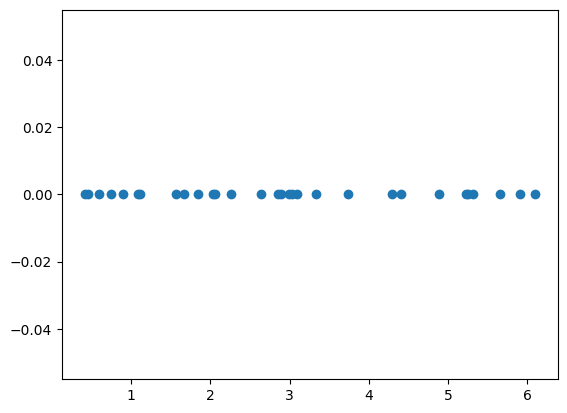

In [314]:
plt.figure()
plt.scatter(centers, [0 for _ in range(30)])
plt.show()